In [1]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import gamma
from simulator import popn2_simple_data_morgan

In [2]:
all_data = pd.DataFrame({'y':[],'u':[],'v':[],'group':[],'N':[],'T':[]})
L = [0.5,10000]
N = [2000,3000,4000,5000,6000,7000,8000,9000,10000,15000]
T = [50,100,150,200,300]
for i in range(15):
    for k in range(len(N)):
        for t in T:
            seed = random.randint(0,100000000)
            data = popn2_simple_data_morgan([N[k]]*3,t,L,2,1e6,5,seed=seed)
            data['N'] = [N[k]]*len(data['y'])
            data['T'] = [t]*len(data['y'])
            all_data = pd.concat([all_data,pd.DataFrame(data)],ignore_index=True)

In [8]:
N = 4000
u=0.5
v = 200
t1=50
t2=100000000
def int_p_L_divide_l(N,u,v,t1,t2):
    cu = - (1/N + u/50)
    cv = - (1/N + v/50)
    a1 = np.exp(cu*t2)*(cu*t2-1)/cu**2 - np.exp(cu*t1)*(cu*t1-1)/cu**2
    a2 = np.exp(cv*t2)*(cv*t2-1)/cv**2 - np.exp(cv*t1)*(cv*t1-1)/cv**2
    return (1/(50*N))*(a1-a2)

int_p_L_divide_l(N,u,v,t1,t2)*200

8.623264960973676

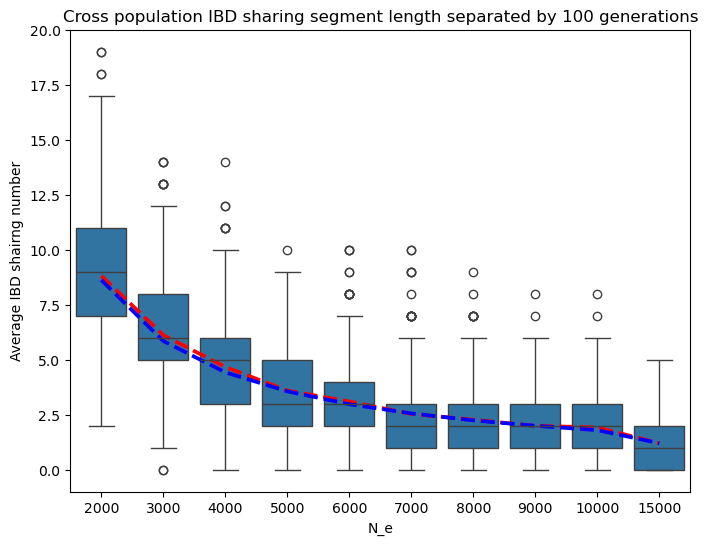

In [24]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='N', y='y', data=all_data[(all_data['T']==50)&(all_data['group']==2)])
mean_values = all_data[(all_data['T']==50)&(all_data['group']==2)].groupby('N')['y'].mean().reset_index()
sns.pointplot(x='N', y='y', data=mean_values, color='red', markers='', linestyles='--')
true_mean = pd.DataFrame({
    'N':mean_values['N'],
    'y':[int_p_L_divide_l(2*x,0.5,200,50,100000000)*200 for x in [2000,3000,4000,5000,6000,7000,8000,9000,10000,15000]]
    })
sns.pointplot(x='N', y='y', data=true_mean, color='blue', markers='', linestyles='--')
unique_n_values = sorted(all_data[(all_data['T']==50)&(all_data['group']==2)]['N'].unique())
plt.xticks(ticks=range(len(unique_n_values)), labels=[str(int(n)) for n in unique_n_values])


plt.ylim([-1, 20])
plt.title('Cross population IBD sharing segment length separated by 50 generations')
plt.xlabel('N_e')
plt.ylabel('Average IBD shairng number')
plt.show()

In [44]:
out = 0
for i in range(11,21):
    for j in range(i+1,21):
        out += 1/20
out/10*2/3/2+19/80*2/3 + 1/3

0.5666666666666667

In [43]:
19/40

0.475

In [42]:
o1=0
for i in range(1,21):
    for j in range(i+1,21):
        o1 += 1/20
o1/20

0.475